<a href="https://colab.research.google.com/github/purvimalviya5/MLProject/blob/main/PurviMalviya_MLProjectReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee Salary Prediction Model**

 Importing necessary libraries

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


Loading the Dataset

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Dropping Unnecessary Columns

In [ ]:
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'])

One - Hot Encoding

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df)

      Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  Mo

Setting Values for X_train & X_test

In [ ]:
X = df.drop(columns=['MonthlyIncome'])  # Assuming 'MonthlyIncome' is the salary column
y = df['MonthlyIncome']

Splitting the Dataset (Test Dataset = 20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [ ]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

LinearRegression()

Test the Model

In [ ]:
y_pred = my_model.predict(X_test)

In [ ]:
predict=pd.DataFrame(y_pred)
print(predict)

                0
0     5919.881441
1     5490.244716
2     2715.522819
3     9112.570060
4     5800.122102
..            ...
289   5443.899307
290   5859.278503
291  16036.215464
292   2421.537019
293   5704.930327

[294 rows x 1 columns]


Evaluating the Model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1364601.4626973802
R^2 Score: 0.9375622994094766


In [ ]:
coefficients = pd.DataFrame(my_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                   Coefficient
Age                                  -3.785250
DailyRate                             0.076641
DistanceFromHome                     -4.119768
Education                             3.631640
EnvironmentSatisfaction             -12.770758
HourlyRate                            0.912983
JobInvolvement                      -75.577996
JobLevel                           2805.336666
JobSatisfaction                     -24.113123
MonthlyRate                          -0.003708
NumCompaniesWorked                   12.060578
PercentSalaryHike                    16.289688
PerformanceRating                  -189.496846
RelationshipSatisfaction             24.484523
StockOptionLevel                    -22.844624
TotalWorkingYears                    42.940886
TrainingTimesLastYear               -10.787121
WorkLifeBalance                     -51.234057
YearsAtCompany                        6.442854
YearsInCurrentRole                   -1.130058
YearsSinceLas

Residual Analysis

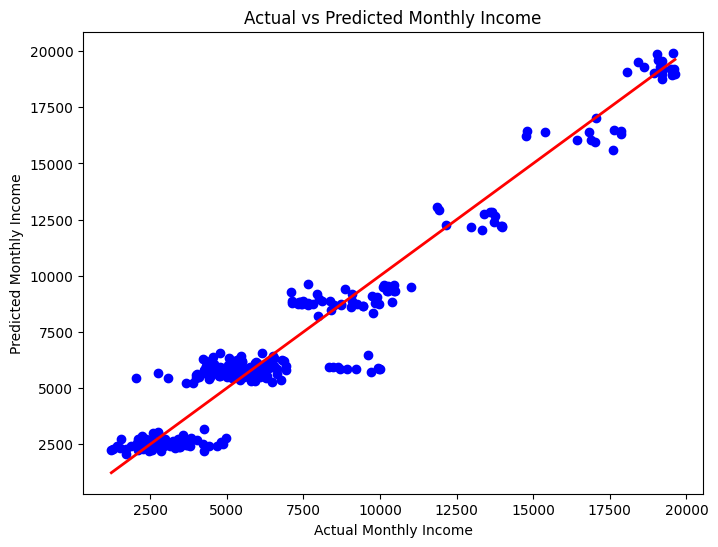

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Monthly Income')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.show()

Visualize Actual vs. Predicted Values

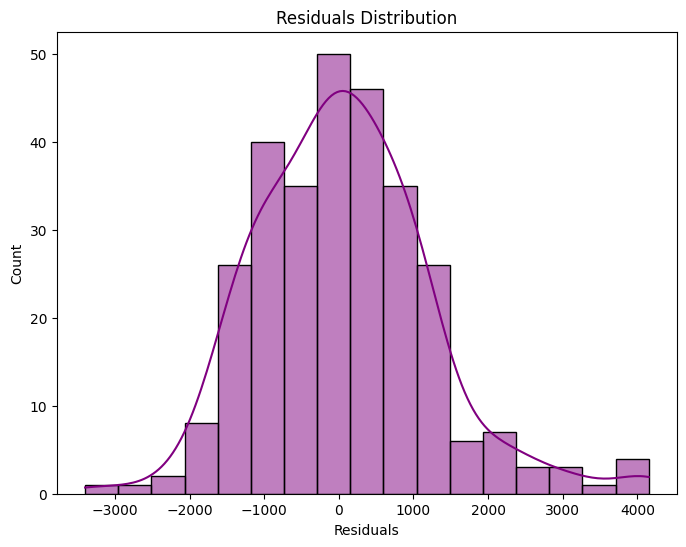

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

Serializing model to use in application

In [ ]:
import pickle

with open("employee_salary_prediction.pkl", "wb") as f:
    pickle.dump(my_model, f)

Loading the Model

In [ ]:
with open("employee_salary_prediction.pkl", "rb") as f:
    loaded_model = pickle.load(f)
    print("Model loaded successfully:", loaded_model)

Model loaded successfully: LinearRegression()


Predictions

In [ ]:
# Assuming X_test is your test dataset
y_pred = loaded_model.predict(X_test)

In [ ]:
# Print the predictions
print("Predictions from loaded model:", y_pred)

Predictions from loaded model: [ 5919.88144055  5490.2447161   2715.52281885  9112.5700595
  5800.12210204  2366.74783041  2513.97774477  2628.07105666
  9424.32523355  2291.40008107  2347.78407002  9312.64612614
  6099.51748062  2374.04500661  2423.35740414  2778.50525396
  5823.08358809  3066.27874859 13079.45469609 15964.65076738
  2365.14202767  6333.48988859  5834.01289376  5839.45467988
  6087.01212768 19214.89461531  2433.72187069  5613.52423609
  2495.6818844   6158.15996594  5722.49443758  5874.79896155
  5690.20188877  8891.27021251  6556.6293113   8738.46862352
 12675.72155244  2739.943265    2569.08169285  2552.53757313
  5854.49210147  6156.15383769  5511.37897586  2605.69109991
  2178.91883963  6201.57006402  8860.04412908  5813.49187622
  6263.63899284  2426.66852331 16432.20147207  2580.14477001
 18953.54211761  5941.96982061  2717.91232663  5512.4079732
  5669.43407866  5595.44891302  6047.76756013  6047.45834896
  8329.37724983  2412.96315105  8749.80105907 16472.4986

In [ ]:
predictions_df = pd.DataFrame(y_pred, columns=['Predicted'])

X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted'] = predictions_df['Predicted']

# Show predictions
print("Predictions from loaded model:", y_pred)

print("Predictions from loaded model : \n", X_test_with_predictions)

Predictions from loaded model: [ 5919.88144055  5490.2447161   2715.52281885  9112.5700595
  5800.12210204  2366.74783041  2513.97774477  2628.07105666
  9424.32523355  2291.40008107  2347.78407002  9312.64612614
  6099.51748062  2374.04500661  2423.35740414  2778.50525396
  5823.08358809  3066.27874859 13079.45469609 15964.65076738
  2365.14202767  6333.48988859  5834.01289376  5839.45467988
  6087.01212768 19214.89461531  2433.72187069  5613.52423609
  2495.6818844   6158.15996594  5722.49443758  5874.79896155
  5690.20188877  8891.27021251  6556.6293113   8738.46862352
 12675.72155244  2739.943265    2569.08169285  2552.53757313
  5854.49210147  6156.15383769  5511.37897586  2605.69109991
  2178.91883963  6201.57006402  8860.04412908  5813.49187622
  6263.63899284  2426.66852331 16432.20147207  2580.14477001
 18953.54211761  5941.96982061  2717.91232663  5512.4079732
  5669.43407866  5595.44891302  6047.76756013  6047.45834896
  8329.37724983  2412.96315105  8749.80105907 16472.4986